In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [43]:
# load cleaned dataset 

df=pd.read_csv("New_clean_dataset.csv")
print(df.to_string())

     Unnamed: 0  gender  SeniorCitizen  Partner  PhoneService  MultipleLines  Contract  PaymentMethod  MonthlyCharges  Churn
0             0       1              0        1             1              0         0              3           67.83      0
1             1       0              0        0             1              1         1              3           67.83      0
2             2       1              0        0             1              1         0              3           67.83      0
3             3       1              1        0             0              0         0              1           67.83      0
4             4       1              1        1             0              1         0              0           67.83      0
5             6       0              0        1             1              0         0              0           41.93      1
6             7       1              1        1             1              0         2              3          106.08      1


In [46]:
df= df.drop(columns=['Unnamed: 0'],errors='ignore')


In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df[['MonthlyCharges']] =sc.fit_transform(df[['MonthlyCharges']])
df

,gender,SeniorCitizen,Partner,PhoneService,MultipleLines,Contract,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,0,0,3,-0.126407,0
1,0,0,0,1,1,1,3,-0.126407,0
2,1,0,0,1,1,0,3,-0.126407,0
3,1,1,0,0,0,0,1,-0.126407,0
4,1,1,1,0,1,0,0,-0.126407,0
...,...,...,...,...,...,...,...,...,...
766,1,0,0,1,1,0,0,-0.126407,0
767,0,0,0,1,0,2,3,-0.126407,0
768,1,0,0,1,1,0,0,-0.126407,0
769,1,0,0,1,0,0,2,-0.126407,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          771 non-null    int64  
 1   SeniorCitizen   771 non-null    int64  
 2   Partner         771 non-null    int64  
 3   PhoneService    771 non-null    int64  
 4   MultipleLines   771 non-null    int64  
 5   Contract        771 non-null    int64  
 6   PaymentMethod   771 non-null    int64  
 7   MonthlyCharges  771 non-null    float64
 8   Churn           771 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 54.3 KB


In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [50]:
# splitting dataset into x and y

x= df[['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines','Contract', 'PaymentMethod', 'MonthlyCharges']]
y =df['Churn']

In [51]:
# split dataset into training and Testing 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)
x_test

,gender,SeniorCitizen,Partner,PhoneService,MultipleLines,Contract,PaymentMethod,MonthlyCharges
671,1,1,0,0,1,0,2,0.230136
286,1,1,0,1,1,0,1,0.295491
728,1,0,0,1,0,0,2,0.742625
434,1,0,0,1,0,0,3,-0.126407
734,1,0,0,1,1,0,0,-0.126407
...,...,...,...,...,...,...,...,...
355,0,0,1,1,0,2,1,-0.126407
443,0,1,1,0,1,0,1,-0.126407
6,1,1,1,1,0,2,3,2.348683
361,0,0,0,0,0,2,2,-0.126407


In [52]:
#Checking class distribution
print(y.value_counts())
# in percentage
print(y.value_counts(normalize=True) *100) 


Churn
0    398
1    373
Name: count, dtype: int64
Churn
0    51.621271
1    48.378729
Name: proportion, dtype: float64


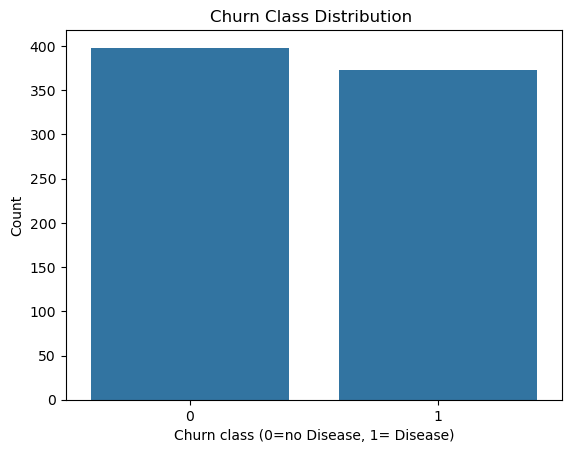

In [53]:
sns.countplot(x=y)
plt.title('Churn Class Distribution ')
plt.xlabel('Churn class (0=no Disease, 1= Disease)')
plt.ylabel('Count')
plt.show()

In [54]:
# Train model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


log_model =LogisticRegression(max_iter=1000,random_state=42)
tree_model= DecisionTreeClassifier(random_state=42)
forest_model =RandomForestClassifier(n_estimators=150,random_state=42)

log_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
forest_model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [55]:
# predict and accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay


# Predict on test data
log_pred = log_model.predict(x_test)
tree_pred = tree_model.predict(x_test)
forest_pred = forest_model.predict(x_test)

log_acc=accuracy_score(y_test,log_pred)
tree_acc =accuracy_score(y_test,tree_pred)
forest_acc =accuracy_score(y_test, forest_pred)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")

# Confusion matrix for Logistic
cm_log =confusion_matrix(y_test, log_pred)
print("\n Confusion Matrix - Logistic regression  :\n",cm_log)

# Confusion matrix for Decision Tree
cm_tree =confusion_matrix(y_test,tree_pred)
print("\n Confusion Matrix - Decision Tree :\n",cm_tree)

# confision Matrix for Random Forest 
cm_forest= confusion_matrix(y_test,forest_pred)
print("\n Confusion matrix - Random Forest :\n",cm_forest)




 Model Accuracies:
Logistic Regression Accuracy: 50.78%
Decision Tree Accuracy: 47.67%
Random Forest Accuracy: 44.04%

 Confusion Matrix - Logistic regression  :
 [[66 31]
 [64 32]]

 Confusion Matrix - Decision Tree :
 [[50 47]
 [54 42]]

 Confusion matrix - Random Forest :
 [[47 50]
 [58 38]]


In [56]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [61]:
# for user input

# User Input for Prediction
print("\n Enter coustomer details to predict heart disease:")

input_data = {
    'gender': float(input("Enter gender:(male=1,female=0) ")),
    'SeniorCitizen': int(input("Enter SeniorCitizen or not (1=yes, 0=No): ")),
    'Partner': int(input("Enter Partner (1=yes ,0=No) :")),
    'PhoneService': int(input("Enter PhoneService(1=yes ,0=No) :")),
    'MultipleLines': int(input("Enter MultipleLines (1=yes, 0=No): ")),
    'Contract': int(input("Enter Contract (0-2):'Month-to-month': 0, 'One year': 1, 'Two year': 2 ")),
    'PaymentMethod': int(input("Enter PaymentMethod (0-3 :Bank transfer': 0, 'Credit card': 1, 'Electronic check': 2, 'Mailed check': 3: ")),
    'MonthlyCharges': float(input("Enter MonthlyCharges: ")),
}

user_df =pd.DataFrame([input_data])

# predict using all model
log_pre= log_model.predict(user_df)[0]

# show prediction
print("Model Prediction")
#print("Logistic Regression :","The customer has cancelled or stopped using the service" if log_pre==1 else "The customer continues to use and pay for the service")


if log_pre==1:
    print("The customer has cancelled or stopped using the service.")
else:
    print("The customer continues to use and pay for the service")




 Enter coustomer details to predict heart disease:


Enter gender:(male=1,female=0)  1
Enter SeniorCitizen or not (1=yes, 0=No):  1
Enter Partner (1=yes ,0=No) : 1
Enter PhoneService(1=yes ,0=No) : 1
Enter MultipleLines (1=yes, 0=No):  1
Enter Contract (0-2):'Month-to-month': 0, 'One year': 1, 'Two year': 2  1
Enter PaymentMethod (0-3 :Bank transfer': 0, 'Credit card': 1, 'Electronic check': 2, 'Mailed check': 3:  1
Enter MonthlyCharges:  55.4


Model Prediction
The customer has cancelled or stopped using the service.


In [62]:
import pickle as pkl


In [63]:
pkl.dump(log_model,open("Coustomerchurn.pkl","wb"))